In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
df.shape

(294478, 5)

In [4]:
df['converted'].mean()

0.11965919355605512

In [5]:
sum(df['converted'])/294478

0.11965919355605512

In [6]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

In [7]:
df.query('group == "treatment" and landing_page != "new_page"')

,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [8]:
df.query('group == "control" and landing_page != "old_page"')

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


<p style='text-align:center'>
    ANOTHER WAY
</p>

In [9]:
df[df['group'] == 'treatment'][df['landing_page'] != 'new_page']

C:\Users\Sadra\AppData\Local\Temp\ipykernel_7064\292538901.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['group'] == 'treatment'][df['landing_page'] != 'new_page']


,user_id,timestamp,group,landing_page,converted
308,857184,2017-01-20 07:34:59.832626,treatment,old_page,0
327,686623,2017-01-09 14:26:40.734775,treatment,old_page,0
357,856078,2017-01-12 12:29:30.354835,treatment,old_page,0
685,666385,2017-01-23 08:11:54.823806,treatment,old_page,0
713,748761,2017-01-10 15:47:44.445196,treatment,old_page,0
...,...,...,...,...,...
293773,688144,2017-01-16 20:34:50.450528,treatment,old_page,1
293817,876037,2017-01-17 16:15:08.957152,treatment,old_page,1
293917,738357,2017-01-05 15:37:55.729133,treatment,old_page,0
294014,813406,2017-01-09 06:25:33.223301,treatment,old_page,0


In [10]:
df[df['group'] == 'control'][df['landing_page'] != 'old_page']

C:\Users\Sadra\AppData\Local\Temp\ipykernel_7064\2703313405.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['group'] == 'control'][df['landing_page'] != 'old_page']


,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
490,808613,2017-01-10 21:44:01.292755,control,new_page,0
846,637639,2017-01-11 23:09:52.682329,control,new_page,1
850,793580,2017-01-08 03:25:33.723712,control,new_page,1
...,...,...,...,...,...
293894,741581,2017-01-09 20:49:03.391764,control,new_page,0
293996,942612,2017-01-08 13:52:28.182648,control,new_page,0
294200,928506,2017-01-13 21:32:10.491309,control,new_page,0
294253,886135,2017-01-06 12:49:20.509403,control,new_page,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [12]:
df2t = df.query('group == "treatment" and landing_page == "new_page"')
df2c = df.query('group == "control" and landing_page == "old_page"')

In [13]:
# df2 = pd.merge(df2t , df2c, how='outer')
df2 = df2t.merge(df2c, how='outer')
df2.head()

,user_id,timestamp,group,landing_page,converted
0,630000,2017-01-19 06:26:06.548941,treatment,new_page,0
1,630001,2017-01-16 03:16:42.560309,treatment,new_page,1
2,630002,2017-01-19 19:20:56.438330,control,old_page,0
3,630003,2017-01-12 10:09:31.510471,treatment,new_page,0
4,630004,2017-01-18 20:23:58.824994,treatment,new_page,0


In [14]:
df2.shape

(290585, 5)

In [15]:
df2.describe()

,user_id,converted
count,290585.000000,290585.000000
mean,788004.825246,0.119597
std,91224.582639,0.324490
min,630000.000000,0.000000
25%,709035.000000,0.000000
50%,787995.000000,0.000000
75%,866956.000000,0.000000
max,945999.000000,1.000000


In [16]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

In [17]:
sum(df2['user_id'].duplicated())

1

In [18]:
df2[df2['user_id'].duplicated(keep='first')]

,user_id,timestamp,group,landing_page,converted
131713,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [19]:
# df3 = df2[:][df2['user_id'] != 773192]
# df3.head()

In [20]:
# df3.nunique()

In [21]:
df3 = df2[~df2.user_id.duplicated(keep='first')]

In [22]:
df3.nunique()

user_id         290584
timestamp       290584
group                2
landing_page         2
converted            2
dtype: int64

In [23]:
df3.converted.mean() * 100

11.959708724499627

In [24]:
df3_treatment = df3.query('group == "treatment"')
df3_control = df3.query('group == "control"')

In [25]:
len(df3_treatment)

145310

In [26]:
len(df3_control)

145274

In [27]:
# df3_control.converted.mean() * 100
df3_control['converted'].mean() * 100

12.03863045004612

In [28]:
# df3_treatment.converted.mean() * 100
df3_treatment['converted'].mean() * 100

11.880806551510565

In [29]:
df3['converted'].mean()

0.11959708724499628

In [30]:
1 - df3['converted'].mean()

0.8804029127550037

In [31]:
len(df3_treatment)

145310

In [32]:
new_page_converted = np.random.choice([1, 0], size=len(df3_treatment), p=[(df3.converted.mean()), (1 - df3.converted.mean())])

In [33]:
new_page_converted

array([0, 0, 0, ..., 0, 0, 0])

In [34]:
len(new_page_converted)

145310

(array([127998.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17312.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

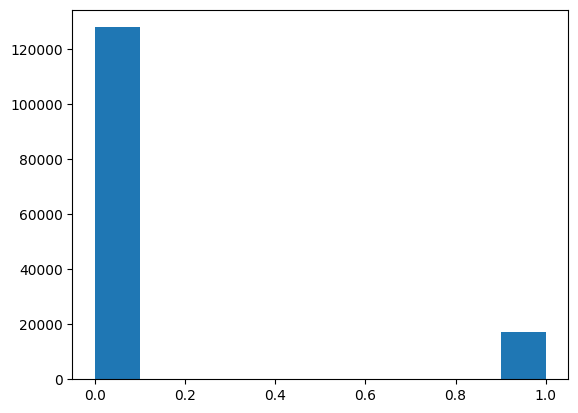

In [35]:
plt.hist(new_page_converted)

In [36]:
old_page_converted = np.random.choice([1, 0], size=len(df3_control), p=[(df3.converted.mean()), (1 - df3.converted.mean())])

In [37]:
old_page_converted

array([0, 0, 0, ..., 0, 1, 0])

In [38]:
len(old_page_converted)

145274

(array([127685.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  17589.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

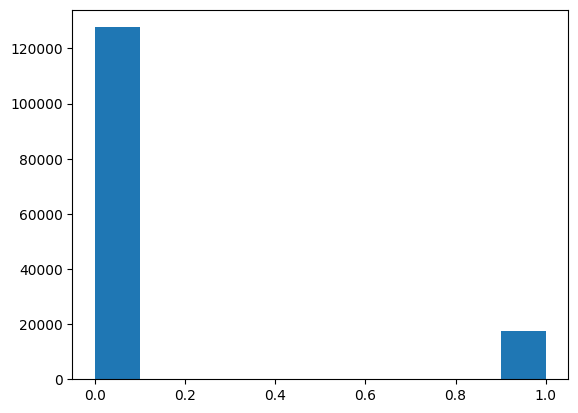

In [39]:
plt.hist(old_page_converted)

In [40]:
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

# random.binomial(n, p, size=None)
#     Draw samples from a binomial distribution.

#     Samples are drawn from a binomial distribution with specified parameters, n trials and p probability of success where ___
#     ___ n an integer >= 0 and p is in the interval [0,1]. (n may be input as a float, but it is truncated to an integer in use)

#     Parameters:

#         n: int or array_like of ints
#             Parameter of the distribution, >= 0. Floats are also accepted, but they will be truncated to integers.

#         p: float or array_like of floats
#             Parameter of the distribution, >= 0 and <=1.

#         size: int or tuple of ints, optional
#             Output shape. If the given shape is, e.g., (m, n, k), then m * n * k samples are drawn. 
#             If size is None (default), a single value is returned if n and p are both scalars. 
#             Otherwise, np.broadcast(n, p).size samples are drawn.

#     Returns:

#         out: ndarray or scalar
#             Drawn samples from the parameterized binomial distribution, where each sample is equal to the number of successes over the n trials.

#                                                                            number of numbers
#                                     Trials(the experiment),    Probability,      Size  / For the possible state!
new_page_converted = np.random.binomial(len(df3_treatment), df3.converted.mean(), 10000) / len(df3_treatment)

In [41]:
# Size: 10000
len(new_page_converted)

10000

In [42]:
new_page_converted

array([0.11931732, 0.12122359, 0.11950313, ..., 0.12094832, 0.12017755,
       0.12048035])

In [43]:
#                                                                            number of numbers
#                                     Trials(the experiment),    Probability,      Size  / For the possible state!
old_page_converted = np.random.binomial(len(df3_control), df3.converted.mean(), 10000) / len(df3_control)

In [44]:
# Size: 10000
len(old_page_converted)

10000

In [45]:
old_page_converted

array([0.11779121, 0.11770861, 0.11861723, ..., 0.1195947 , 0.11834878,
       0.12120545])

In [46]:
p_diffs = new_page_converted - old_page_converted

In [47]:
p_diffs

array([ 0.00152611,  0.00351499,  0.0008859 , ...,  0.00135362,
        0.00182878, -0.00072509])

In [48]:
len(p_diffs)

10000

In [49]:
p_diffs.mean()

4.4133105254749785e-06

In [50]:
# ab_data_diffs = df3_treatment.converted.mean() - df3_control.converted.mean()
ab_data_diffs = df3_treatment['converted'].mean() - df3_control['converted'].mean()
ab_data_diffs

-0.0015782389853555567

In [51]:
(p_diffs > ab_data_diffs).mean() * 100

91.02

In [52]:
p_value = (p_diffs < ab_data_diffs).mean() * 100
p_value

8.98

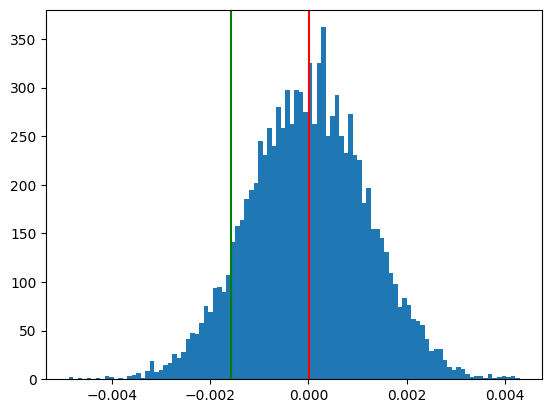

In [53]:
plt.hist(p_diffs, bins=100)
low = ab_data_diffs
high = p_diffs.mean()
plt.axvline(x = low, color='g')
plt.axvline(x = high, color='r')